In [2]:
import numpy as np
import matplotlib.pyplot as plt

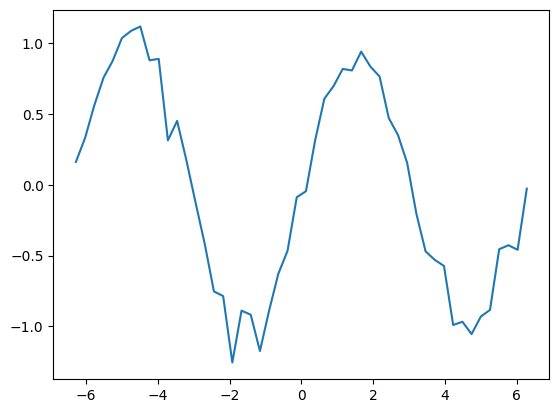

(40, 10, 1)
(40, 1)


In [3]:
x_data = np.linspace(-2*np.pi,2*np.pi)
sin_data = np.sin(x_data) + 0.1*np.random.randn(len(x_data))

plt.plot(x_data,sin_data)
plt.show()

n_rnn = 10
n_sample = len(x_data) - n_rnn
x = np.zeros((n_sample,n_rnn))
t = np.zeros((n_sample,))

for i in range(0,n_sample):
  x[i] = sin_data[i:i+n_rnn]
  t[i] = sin_data[i+n_rnn]

x = x.reshape(n_sample,n_rnn,1)
print(x.shape)
t = t.reshape(n_sample,1)
print(t.shape)

In [4]:
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN,LSTM

In [5]:
batch_size = 8
n_in = 1
n_mid = 20
n_out = 1

In [6]:
model_rnn = Sequential()
model_rnn.add(SimpleRNN(n_mid,input_shape=(n_rnn,n_in),return_sequences=False))
model_rnn.add(Dense(n_out,activation="linear"))
model_rnn.compile(loss="mean_squared_error",optimizer="sgd")
print(model_rnn.summary())

model_lstm = Sequential()
model_lstm.add(LSTM(n_mid,input_shape=(n_rnn,n_in),return_sequences=False))
model_lstm.add(Dense(n_out,activation="linear"))
model_lstm.compile(loss="mean_squared_error",optimizer="sgd")
print(model_lstm.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 20)                440       
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                1760      
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,781
Trainable p

In [7]:
import time

epochs = 200
#RNN
start_time = time.time()
history_rnn = model_rnn.fit(x,t,epochs=epochs,batch_size=batch_size,verbose=0)
print("学習時間 --RNN--:",time.time() - start_time)

#LSTM
start_time = time.time()
history_lstm = model_lstm.fit(x,t,epochs=epochs,batch_size=batch_size,verbose=0)
print("学習時間 --LSTM--:",time.time() - start_time)

学習時間 --RNN--: 1.9721331596374512
学習時間 --LSTM--: 2.831169843673706


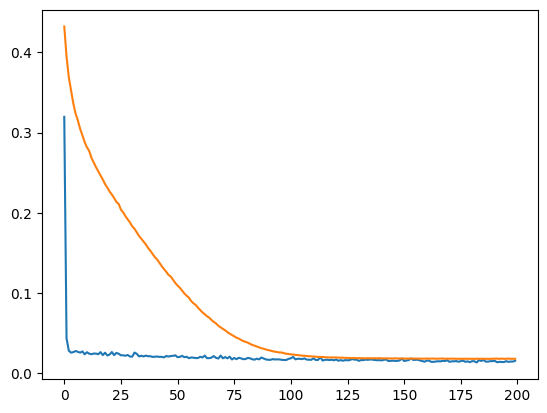

In [8]:
loss_rnn = history_rnn.history['loss']
loss_lstm = history_lstm.history['loss']

plt.plot(np.arange(len(loss_rnn)),loss_rnn,label="RNN")
plt.plot(np.arange(len(loss_lstm)),loss_lstm,label="LSTM")
plt.show()

1/1 [==============================] - 0s 15ms/step


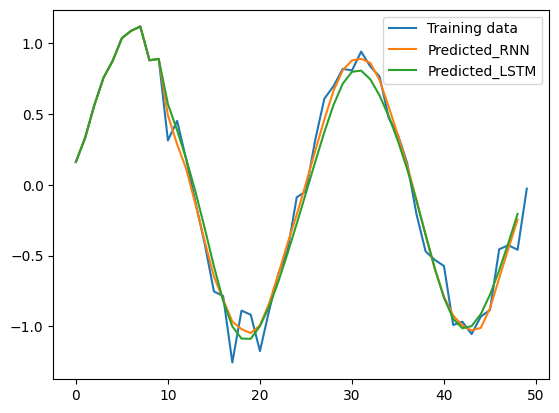

In [9]:
predicted_rnn = x[0].reshape(-1)
predicted_lstm = x[0].reshape(-1)

for i in range(1,n_sample):
  y_rnn = model_rnn.predict(predicted_rnn[-n_rnn:].reshape(1,n_rnn,1))
  predicted_rnn = np.append(predicted_rnn,y_rnn[0])
  y_lstm = model_lstm.predict(predicted_lstm[-n_rnn:].reshape(1,n_rnn,1))
  predicted_lstm = np.append(predicted_lstm,y_lstm[0][0])

plt.plot(np.arange(len(sin_data)),sin_data,label='Training data')
plt.plot(np.arange(len(predicted_rnn)),predicted_rnn,label='Predicted_RNN')
plt.plot(np.arange(len(predicted_lstm)),predicted_lstm,label='Predicted_LSTM')
plt.legend()
plt.show()